# Simple Sentence Similarity

In this HW, we will compare some simple ways of computing sentence similarity and investigate how they perform.

## Data exporation (10%)

### STS Benchmark

The STS Benchmark brings together the English data from the SemEval sentence similarity tasks between 2012 and 2017. The data is split in training, development and test data: http://ixa2.si.ehu.es/stswiki/index.php/STSbenchmark

Can you do some data exporation for this dataset? 


In [1]:
import pandas as pd
import csv

In [3]:
colnames = ['genre','filename', 'year','id', 'score', 'sentence1', 'sentence2']
train_sts= pd.read_csv('stsbenchmark/sts-train.csv', names= colnames, delimiter = '\t')
train_sts.head(3)

test_sts= pd.read_csv('stsbenchmark/sts-test.csv', names= colnames, delimiter = '\t',engine='python',error_bad_lines=False)
test_sts.head(3)

Skipping line 892: '	' expected after '"'
Skipping line 899: '	' expected after '"'
Skipping line 917: '	' expected after '"'
Skipping line 918: '	' expected after '"'
Skipping line 932: '	' expected after '"'
Skipping line 940: '	' expected after '"'
Skipping line 962: '	' expected after '"'
Skipping line 982: '	' expected after '"'
Skipping line 990: '	' expected after '"'
Skipping line 996: '	' expected after '"'
Skipping line 1017: '	' expected after '"'
Skipping line 1025: '	' expected after '"'
Skipping line 1029: '	' expected after '"'
Skipping line 1050: '	' expected after '"'
Skipping line 1052: '	' expected after '"'
Skipping line 1054: '	' expected after '"'
Skipping line 1070: '	' expected after '"'
Skipping line 1071: '	' expected after '"'
Skipping line 1073: '	' expected after '"'
Skipping line 1077: '	' expected after '"'
Skipping line 1104: '	' expected after '"'
Skipping line 1110: '	' expected after '"'
Skipping line 1119: unexpected end of data
Skipping line 626: Ex

,genre,filename,year,id,score,sentence1,sentence2
0,main-captions,MSRvid,2012test,24,2.5,A girl is styling her hair.,A girl is brushing her hair.
1,main-captions,MSRvid,2012test,33,3.6,A group of men play soccer on the beach.,A group of boys are playing soccer on the beach.
2,main-captions,MSRvid,2012test,45,5.0,One woman is measuring another woman's ankle.,A woman measures another woman's ankle.


In [5]:
test_sts = test_sts.drop(['genre','filename','year','id'],axis=1)

,score,sentence1,sentence2
0,2.5,A girl is styling her hair.,A girl is brushing her hair.
1,3.6,A group of men play soccer on the beach.,A group of boys are playing soccer on the beach.
2,5.0,One woman is measuring another woman's ankle.,A woman measures another woman's ankle.


In [6]:
train_sts = train_sts.drop(['genre','filename','year','id'],axis=1)

### Histogram plot with X-axis as length of every sentence and Y-axis as the count of sentences in sentence1

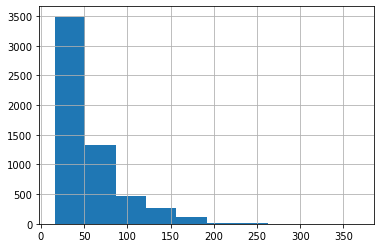

In [68]:
import matplotlib
from matplotlib import pyplot as plt
train_sts['sentence1'].str.len().hist()
plt.show()

In [7]:
import nltk

STOP = set(nltk.corpus.stopwords.words("english"))

class Sentence:
    """
    Used as a base class to preprocess any 
    sentence by tokenizing and removing stopwords.
    This doesn't remove punctuations.
    """
    def __init__(self, sentence):
        self.raw = sentence
        normalized_sentence = sentence.replace("‘", "'").replace("’", "'")
        self.tokens = [t.lower() for t in nltk.word_tokenize(normalized_sentence)]
        self.tokens_without_stop = [t for t in self.tokens if t not in STOP]

### Visualization of the data-
  
Plot the top 30 most frequent words used in sts_train sentences after removing the stopwords. This is done to gain an insight in the overall data dealing with.  
Steps followed for this are as follows:
- Convert the sentences in sts_train to Sentence class objects.
- Use Sentence class 'tokens_without_stop' attribute for further analyses.
- Remove punctuations from sentences.
- Using Counter object, count word frequency.
- Sort the word frequency Counter iterable.
- Convert the word frequency Counter to a pandas dataframe.
- Plot top 30 most frequent words alongwith frequency.

In [56]:
sentences1 = [Sentence(s) for s in train_sts['sentence1']]
sentences2 = [Sentence(str(s)) for s in train_sts['sentence2']]

In [62]:
import string
table = str.maketrans('', '', string.punctuation)
sentence1_words = list()
sentence2_words = list()

for i in range(0,len(sentences1)):
    
    stripped_1 = [w.translate(table) for w in sentences1[i].tokens_without_stop]
    stripped_2 = [w.translate(table) for w in sentences2[i].tokens_without_stop]
    
    sentence1_words += stripped_1
    sentence2_words += stripped_2


In [82]:
word_freq_sentence1 = []
word_freq_sentence2 = []
word_freq_sentence1= Counter(sentence1_words)  # returns a Counter, dict-like object
word_freq_sentence2 = Counter(sentence2_words)

colnames = ['word','frequency']
word_freq_sentence1 =  pd.DataFrame(sorted(word_freq_sentence1.items(), key=lambda pair: pair[1], reverse=True),columns=colnames)
word_freq_sentence2 =  pd.DataFrame(sorted(word_freq_sentence2.items(), key=lambda pair: pair[1], reverse=True),columns=colnames)




### Top 30 words in sentence1 and sentence2 of train_sts

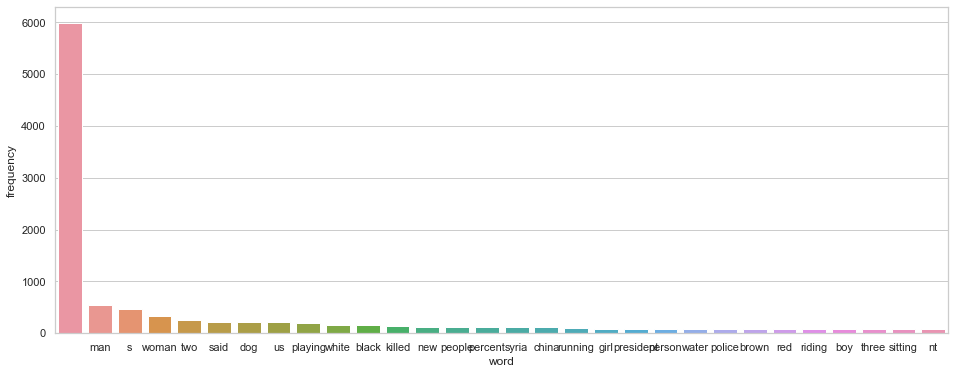

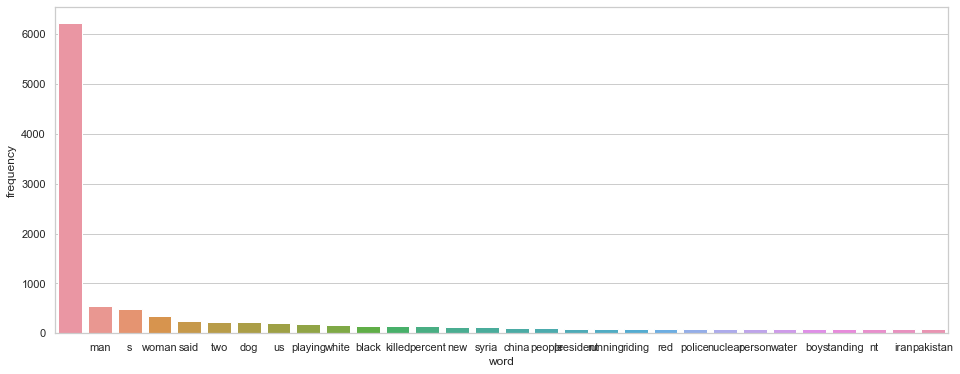

In [81]:
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(16, 6))
ax = sns.barplot(x="word", y="frequency", data=word_freq_sentence1[:30])

sns.set(style="whitegrid")
plt.figure(figsize=(16, 6))
ax = sns.barplot(x="word", y="frequency", data=word_freq_sentence2[:30])



## Words embedding (20%)

First we need to do some preparation: some of our models require the sentences to be tokenized, some do not. Try words embedding method like CBOW, SKIP-GRAM, and Glove.

### Word Embedding methods used- Word2Vec and GloVe

#### Word2Vec- 

Word2Vec method is used to learn word-embeddings using a shallow neural network. Word2Vec uses a two-layer neural network.Two types of Word2Vec models are:
- CBOW(Continuous Bag of Words)
- SKIP-GRAM

#### GloVe model-
  
GloVe stands for Global Vectors. It is an unsupervised learning algorithm trained on global statistics corpus. Global statistics corpus is basically global word-word co-occurence statistics from a corpus. GloVe model converts words to vectors while trying to ensure that word-embeddings convey the same meaning as original words together.

In [10]:
import gensim
import os
from gensim.models import Word2Vec
from gensim.scripts.glove2word2vec import glove2word2vec

PATH_TO_WORD2VEC = os.path.expanduser("~/Downloads/GoogleNews-vectors-negative300.bin")
PATH_TO_GLOVE = os.path.expanduser("~/Downloads/glove.840B.300d.txt")

word2vec = gensim.models.KeyedVectors.load_word2vec_format(PATH_TO_WORD2VEC, binary=True)

In [11]:
# GloVe model is converted to Word2Vec and loaded as a Word2Vec model
tmp_file = "/tmp/glove.840B.300d.w2v.txt"
glove2word2vec(PATH_TO_GLOVE, tmp_file)
glove = gensim.models.KeyedVectors.load_word2vec_format(tmp_file)

Link for downloading frequencies.tsv, doc_frequencies.tsv- https://github.com/nlptown/nlp-notebooks/tree/master/data/sentence_similarity
These word frequencies have been collected from Wikipedia and stored in tsv format

In [12]:
PATH_TO_FREQUENCIES_FILE = "frequencies.tsv"
PATH_TO_DOC_FREQUENCIES_FILE = "doc_frequencies.tsv"

def read_tsv(f):
    frequencies = {}
    with open(f) as tsv:
        tsv_reader = csv.reader(tsv, delimiter="\t")
        for row in tsv_reader: 
            frequencies[row[0]] = int(row[1])
        
    return frequencies
        
frequencies = read_tsv(PATH_TO_FREQUENCIES_FILE)
doc_frequencies = read_tsv(PATH_TO_DOC_FREQUENCIES_FILE)
doc_frequencies["NUM_DOCS"] = 1288431

## Similarity methods (60%)

Try to implement following three metrics for sentence similarity comparison: (1) Cosine, (2)Word Mover's Distance, and (3) Smooth Inverse Frequency. 


### Cosine Similarity-
  
Cosine similarity between two text documents is calculated using scipy's cosine_similarity function

In [43]:
from collections import Counter
import math

def cosine_similarity_benchmark(sentences1, sentences2, model=None, use_stoplist=False, doc_freqs=None):
    """
    Calculate and return pairwise cosine similarity between sentences
    given two text documents.
    Output: n cosine similarity values for n pairwise documents
    """

    if doc_freqs is not None:
        N = doc_freqs["NUM_DOCS"]
    
    sims = []
    for (sent1, sent2) in zip(sentences1, sentences2):
    
        tokens1 = sent1.tokens_without_stop if use_stoplist else sent1.tokens
        tokens2 = sent2.tokens_without_stop if use_stoplist else sent2.tokens

        tokens1 = [token for token in tokens1 if token in model]
        tokens2 = [token for token in tokens2 if token in model]
        
        if len(tokens1) == 0 or len(tokens2) == 0:
            sims.append(0)
            continue
        
        tokfreqs1 = Counter(tokens1)
        tokfreqs2 = Counter(tokens2)
        
        weights1 = [tokfreqs1[token] * math.log(N/(doc_freqs.get(token, 0)+1)) 
                    for token in tokfreqs1] if doc_freqs else None
        weights2 = [tokfreqs2[token] * math.log(N/(doc_freqs.get(token, 0)+1)) 
                    for token in tokfreqs2] if doc_freqs else None
                
        embedding1 = np.average([model[token] for token in tokfreqs1], axis=0, weights=weights1).reshape(1, -1)
        embedding2 = np.average([model[token] for token in tokfreqs2], axis=0, weights=weights2).reshape(1, -1)

        sim = cosine_similarity(embedding1, embedding2)[0][0]
        sims.append(sim)

    return sims

### Word Mover's distance-
  
Word Mover's distance calculates Euclidean distance between two sentence vectors. Sentence vectors are formed by using word vectors of each word in the sentence. The word vector values are taken from word-embedding values in the given model. 

In [51]:
def wmd_benchmark(sentences1, sentences2, model, use_stoplist=False):
    """
    Calculate Word Mover's distance between two sentences from different documents
    using gensim's wmdistance method.
    Output: A list of WMD values
    """
    
    sims = []
    for (sent1, sent2) in zip(sentences1, sentences2):
    
        tokens1 = sent1.tokens_without_stop if use_stoplist else sent1.tokens
        tokens2 = sent2.tokens_without_stop if use_stoplist else sent2.tokens
        
        tokens1 = [token for token in tokens1 if token in model]
        tokens2 = [token for token in tokens2 if token in model]
        
        if len(tokens1) == 0 or len(tokens2) == 0:
            tokens1 = [token for token in sent1.tokens if token in model]
            tokens2 = [token for token in sent2.tokens if token in model]
            
        sims.append(-model.wmdistance(tokens1, tokens2))
        
    return sims

### Smooth Inverse Frequency-
  
Smooth Inverse Frequency is calculated using following steps:
- Calculate SIF multiplier. SIF multiplier is inversely proportional to frequency of given word. For every word in corpus, SIF multiplier is: a/(a+frequency of word). 
- Calculate embeddings of the sentence as weighted average of each of the word-embeding values in the sentence.
- Perform common component removal on the sentence embeddings
- Calculate cosine similarity of the resulting sentence embeddings.  
  
Smooth Inverse Frequency doesn't give additional weightage to words that occur frequently as frequency of word is inversely proportional to the weights used in calculating sentence embeddings. Value of a is generally 0.001. It is taken as learning rate.


In [52]:
from sklearn.decomposition import TruncatedSVD
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

def remove_first_principal_component(E):
    """
    Calculate first principal component using TruncatedSVD and remove it from input
    Output: Part of input with first principal component subtracted
    """
    svd = TruncatedSVD(n_components=1, n_iter=10, random_state=0)
    svd.fit(E)
    principal_components = svd.components_
    EE = E - E.dot(principal_components.transpose()) * principal_components
    return EE


def smooth_inverse_freq_benchmark(sentences1, sentences2, model, freqs={}, use_stoplist=False, a=0.001):
    """
    Calculate Smooth Inverse Frequency values from two different sentence documents,
    Output: A list of SIF similarity values between two text documents
    """
    total_freq = sum(freqs.values())
    
    embeddings = []
    
    
    for (sent1, sent2) in zip(sentences1, sentences2): 
        
        tokens1 = sent1.tokens_without_stop if use_stoplist else sent1.tokens
        tokens2 = sent2.tokens_without_stop if use_stoplist else sent2.tokens
        
        tokens1 = [token for token in tokens1 if token in model]
        tokens2 = [token for token in tokens2 if token in model]
        
        weights1 = [a/(a+freqs.get(token,0)/total_freq) for token in tokens1]
        weights2 = [a/(a+freqs.get(token,0)/total_freq) for token in tokens2]
        
        embedding1 = np.average([model[token] for token in tokens1], axis=0, weights=weights1)
        embedding2 = np.average([model[token] for token in tokens2], axis=0, weights=weights2)
        
        embeddings.append(embedding1)
        embeddings.append(embedding2)
        
    embeddings = remove_first_principal_component(np.array(embeddings))
    sims = [cosine_similarity(embeddings[idx*2].reshape(1, -1), 
                              embeddings[idx*2+1].reshape(1, -1))[0][0] 
            for idx in range(int(len(embeddings)/2))]

    return sims

## Experiments (10%)

Finally, could you apply these three similairy measures to collected data (STS Benchmark) and compare these measures? 

In [53]:
import scipy
def run_experiment(df, benchmarks): 
    """
    Given dataframe and benchmark functions,
    get similarity values from respective benchmark functions,
    and calculate Pearson and Spearman correlation between given similarity score 
    and returned similarity score from benchmark methods
    Output: Pearson correlation, Spearman correlation
    """
    
    sentences1 = [Sentence(s) for s in df['sentence1']]
    sentences2 = [Sentence(str(s)) for s in df['sentence2']]
    
    pearson_cors, spearman_cors = [], []
    for label, method in benchmarks:
        sims = method(sentences1, sentences2)
        pearson_correlation = scipy.stats.pearsonr(sims, df['score'])[0]
        print(label, pearson_correlation)
        pearson_cors.append(pearson_correlation)
        spearman_correlation = scipy.stats.spearmanr(sims, df['score'])[0]
        spearman_cors.append(spearman_correlation)
        
    return pearson_cors, spearman_cors

In [54]:
import functools as ft

benchmarks = [("AVG-W2V", ft.partial(cosine_similarity_benchmark, model=word2vec, use_stoplist=False)),
              ("AVG-W2V-STOP", ft.partial(cosine_similarity_benchmark, model=word2vec, use_stoplist=True)),
              ("AVG-W2V-TFIDF", ft.partial(cosine_similarity_benchmark, model=word2vec, use_stoplist=False, doc_freqs=doc_frequencies)),
              ("AVG-GLOVE", ft.partial(cosine_similarity_benchmark, model=glove, use_stoplist=False)),
              ("AVG-GLOVE-STOP", ft.partial(cosine_similarity_benchmark, model=glove, use_stoplist=True)),
              ("AVG-GLOVE-TFIDF", ft.partial(cosine_similarity_benchmark, model=glove, use_stoplist=False, doc_freqs=doc_frequencies)),
              ("WMD-W2V-STOP", ft.partial(wmd_benchmark, model=word2vec, use_stoplist=True)), 
              ("WMD-GLOVE", ft.partial(wmd_benchmark, model=glove, use_stoplist=False)), 
              ("WMD-GLOVE-STOP", ft.partial(wmd_benchmark, model=glove, use_stoplist=True)), 
              ("SIF-W2V", ft.partial(smooth_inverse_freq_benchmark, freqs=frequencies, model=word2vec, use_stoplist=False)),
              ("SIF-GLOVE", ft.partial(smooth_inverse_freq_benchmark, freqs=frequencies, model=glove, use_stoplist=False))]

pearson_results, spearman_results = {}, {}
pearson_results["STS-TRAIN"], spearman_results["STS-TRAIN"] = run_experiment(train_sts, benchmarks)
pearson_results["STS-TEST"], spearman_results["STS-TEST"] = run_experiment(test_sts, benchmarks)


AVG-W2V 0.6840077438971319
AVG-W2V-STOP 0.7021680249586411
AVG-W2V-TFIDF 0.689882304644031
AVG-GLOVE 0.5442473415312128
AVG-GLOVE-STOP 0.6541649077211971
AVG-GLOVE-TFIDF 0.4490855812218878
WMD-W2V-STOP 0.6747031818983669
WMD-GLOVE 0.5393387289156595
WMD-GLOVE-STOP 0.6539761169220493
SIF-W2V 0.7159467669157342
SIF-GLOVE 0.7152338690216051
AVG-W2V 0.7526107081038922
AVG-W2V-STOP 0.7825366536127351
AVG-W2V-TFIDF 0.7561293709563371
AVG-GLOVE 0.6551564290364326
AVG-GLOVE-STOP 0.7409672309904225
AVG-GLOVE-TFIDF 0.4612098400762126
WMD-W2V-STOP 0.7381317513972451
WMD-GLOVE 0.544740110387147
WMD-GLOVE-STOP 0.7024854464695466
SIF-W2V 0.7866482924285807
SIF-GLOVE 0.7744882171081284


### Conclusion-
 Pearson correlation value printed above is the correlation between actual similarity scores in the given datasets and calculated similarity score between two sentences. Therefore, higher the correlation results, better is the performance of the model. From checking the Pearson correlation results, clearly models using word2vec performed better than GloVe models. For all the benchmarks tested, using models on stopwords removed sentences improved performance of the models.

### References:

- https://towardsdatascience.com/exploratory-data-analysis-for-natural-language-processing-ff0046ab3571
- https://towardsdatascience.com/implementing-word2vec-in-pytorch-skip-gram-model-e6bae040d2fb
- https://zhuanlan.zhihu.com/p/118728697
- https://towardsdatascience.com/fse-2b1ffa791cf9
- https://github.com/nlptown/nlp-notebooks/blob/master/Data%20exploration%20with%20sentence%20similarity.ipynb
- https://nlp.stanford.edu/projects/glove/
- https://nlp.stanford.edu/pubs/glove.pdf
- https://towardsdatascience.com/introduction-to-word-embedding-and-word2vec-652d0c2060fa
- https://radimrehurek.com/gensim/auto_examples/tutorials/run_wmd.html#sphx-glr-auto-examples-tutorials-run-wmd-py
- http://mccormickml.com/2016/04/19/word2vec-tutorial-the-skip-gram-model/
- https://openreview.net/pdf?id=SyK00v5xx
- https://github.com/PrincetonML/SIF
- https://towardsdatascience.com/nlp-101-word2vec-skip-gram-and-cbow-93512ee24314
- https://medium.com/@vladbezden/how-to-set-seaborn-plot-size-in-jupyter-notebook-63ffb1415431
- https://seaborn.pydata.org/generated/seaborn.barplot.html